In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [2]:
# Datensatz einlesen
original_dms_data = pd.read_csv('/Users/liza/Desktop/Bioinfo Project/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv')
# split first column of df into multiple columns
original_dms_data_col = original_dms_data
only_mutants = original_dms_data["mutant"].to_frame()
original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_93968/1912877112.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)


In [3]:
# zählen wieviele Mutationen jede Sequenz hat
list_mut_count_in_progress = []
for i in range(len(original_dms_data['mutant'])):
    list_mut_count_in_progress.append(original_dms_data['mutant'].iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [4]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)
working_dataframe.head()

,DMS_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,mut_count
0,1.301030,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None,7
1,3.137350,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None,4
2,1.553913,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None,5
3,3.404237,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None,3
4,3.738586,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [5]:
#alle möglichen Mutationen rausschreiben in den Spalten
from pandas import unique
working_dataframe_only_ms = working_dataframe.loc[:, ["m1", "m2", "m3", 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']]
all_possible_mutations = working_dataframe_only_ms.values.flatten().tolist()
all_possible_mutations = list(set(all_possible_mutations))
#hat einen none Wert, weil der auch ein Wert in der Liste ist -> wegmachen
while None in all_possible_mutations:
    all_possible_mutations.remove(None)
only_mutants_list = only_mutants['mutant']


In [6]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)


In [7]:
list_of_dfs = []

# For-Loop zum Erstellen und Hinzufügen eines neuen Columns in jedem Durchlauf
for i in all_possible_mutations:
    new_column_name = f'{i}'
    new_column_values = [only_mutants_list.str.contains(i, regex= False)]
    new_df = pd.DataFrame({new_column_name: new_column_values})
    new_df_exploded = new_df.explode(new_column_name)
    list_of_dfs.append(new_df_exploded)

# Verketten der DataFrames in der Liste
result_how_often = pd.concat(list_of_dfs, axis=1)
result_how_often = result_how_often.reset_index(drop=True)

## result_how_often.to_csv('dataframe_mutanten_Mutationen.csv', index=True)

In [8]:
# dataframe aus original machen der nur mutcount und fscore hat
count_fscore_frame = working_dataframe[['DMS_score', 'mut_count']]

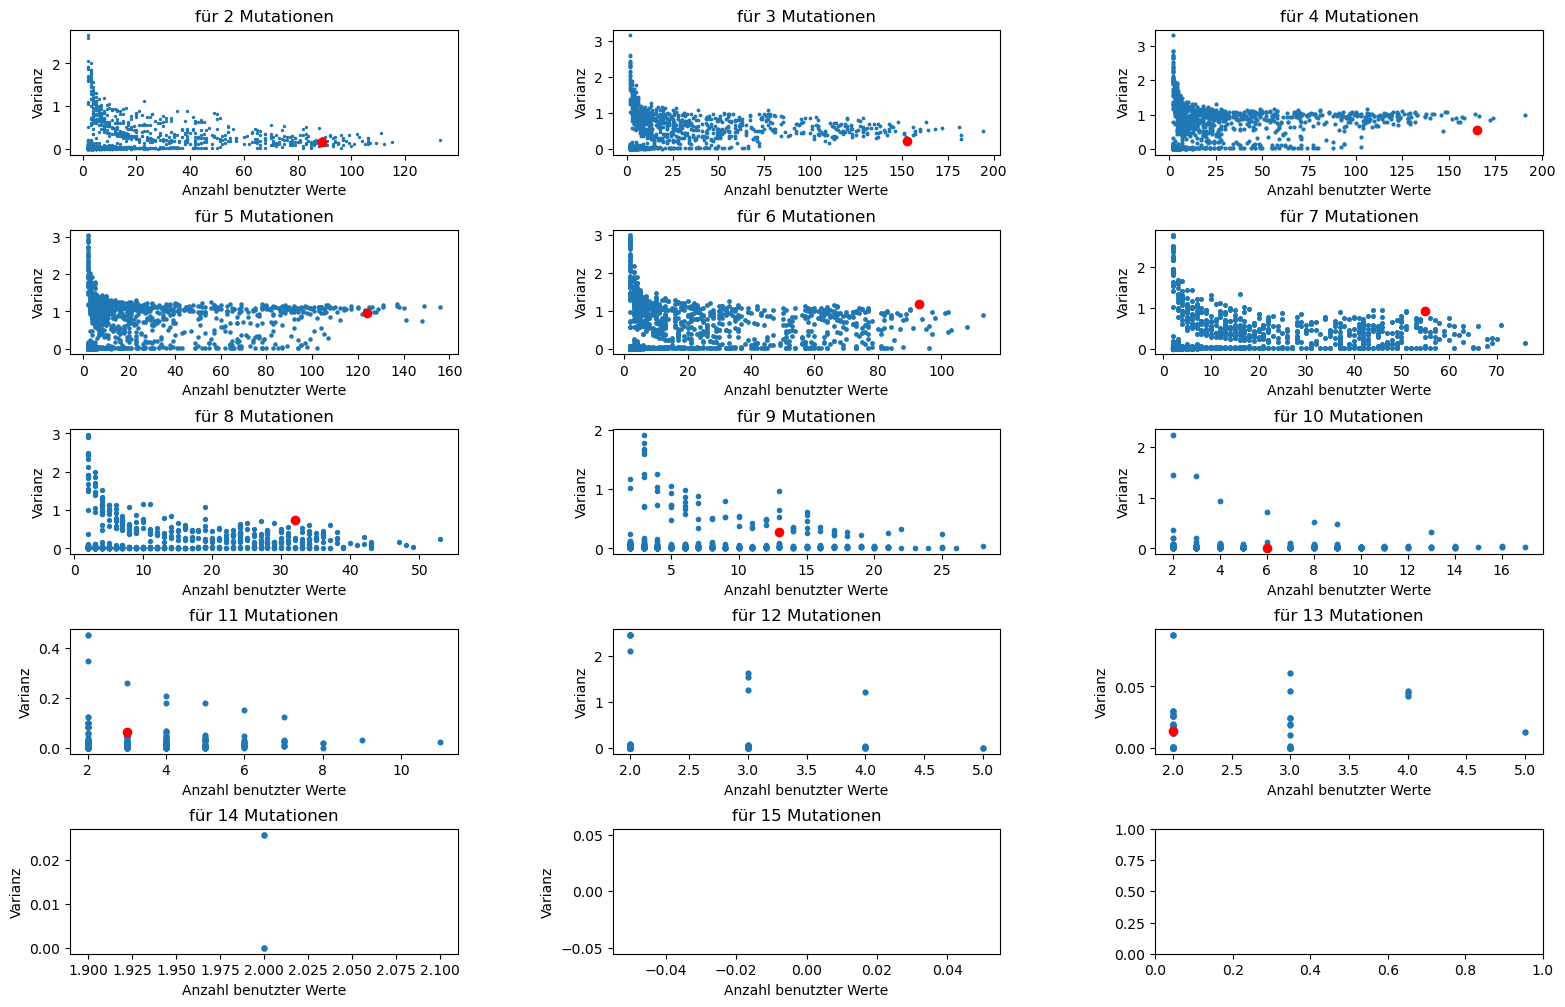

In [9]:
#verallgemeinert
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(19, 12))  # Abbildung und Achsenobjekte erstellen
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for j, ax in zip(range(2, 16), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()
        variance_per_mutant_list.append(varianz_mut)

    variance_per_mutant_series = pd.Series(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_df = variance_per_mutant_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_for_variance = pd.Series(how_many_for_variance, index=all_possible_mutations)
    how_many_for_variance_df = how_many_for_variance.to_frame()


    how_many_AND_variance_df = pd.concat([how_many_for_variance_df, variance_per_mutant_df], axis = 1)
    how_many_AND_variance_df.columns = ['Anzahl benutzter Werte', 'Varianz']
    how_many_AND_variance_df = how_many_AND_variance_df.dropna()

#scatter plot erstellen, mit benennungen
    ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'],how_many_AND_variance_df['Varianz'], s = j )
    ax.set_xlabel('Anzahl benutzter Werte')
    ax.set_ylabel('Varianz')

    if "V163A" in how_many_AND_variance_df.index:
        ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df['Varianz']['V163A'], c='red')
    ax.set_title(f'für {j} Mutationen')



VORBEREITUNG RANKINGS: Definitionen etc


In [10]:
#Varianzen mitteln für jede Mutation, über die Mutationscounts hinweg
frame_zum_mitteln_variance = pd.DataFrame(index = all_possible_mutations)
variance_per_mutant_count_list = []

# ACHTUNG: es werden nur counts von 2 bis 7 einbezogen weil die mit mehr sowieso "kaputt" sind!!!
for j, ax in zip(range(2, 8), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()  #die varianz je mutation je anzahl
        variance_per_mutant_list.append(varianz_mut) #liste der Varianzen ALLER Mutationen je anzahl

    variance_per_mutant_df = pd.DataFrame(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_count_list.append(variance_per_mutant_df)
variance_per_mutant_count_df = pd.concat(variance_per_mutant_count_list, axis=1)
variance_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)

# Varianz je Mutation je Mutationanzahl
variance_per_mutant_count_df
# dataframe mit allen varianzen (Zellen) pro alle mutationen (rows) pro alle counts (columns)
mean_variances_per_mutations = pd.DataFrame(variance_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_93968/1098898036.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  variance_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)


In [24]:
print(variance_per_mutant_count_df.loc["K3Q"])

2    1.846276
3    0.018476
4    0.074044
5    0.929323
6         NaN
7         NaN
Name: K3Q, dtype: float64


In [12]:
how_many_per_mutant_count_list = []

for j, ax in zip(range(2, 8), axes.flatten()):
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_per_mutant_df = pd.DataFrame(how_many_for_variance, index=all_possible_mutations)
    how_many_per_mutant_count_list.append(how_many_per_mutant_df)
how_many_per_mutant_count_df = pd.concat(how_many_per_mutant_count_list, axis=1)
how_many_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)

mean_how_many_per_mutations = pd.DataFrame(how_many_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_93968/2598593114.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  how_many_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)


In [13]:
combined_means_variance_how_many = pd.concat([mean_variances_per_mutations, mean_how_many_per_mutations], axis=1)
combined_means_variance_how_many.columns = ['mean_variances_per_mutations', 'mean_how_many_per_mutations']

----------------RANKING 0: nur nach Varianz der fscores

In [14]:
sorted_Ranking0 = combined_means_variance_how_many.sort_values(by='mean_variances_per_mutations')

# Ausgabe des sortierten DataFrames
sorted_Ranking0

,mean_variances_per_mutations,mean_how_many_per_mutations
Y66S,1.264636e-14,1.333333
M233S,7.899120e-14,0.500000
A110P,8.391788e-14,1.000000
A206P,1.307599e-13,0.666667
F100P,1.963388e-13,0.666667
...,...,...
N121L,NaN,0.166667
Q184W,NaN,0.333333
E32M,NaN,0.166667
S175D,NaN,0.166667


In [15]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking0= sorted_Ranking0.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking0.html', 'w') as file:
    file.write(styled_ranking0.render())

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_93968/1251057533.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking0.render())


----------------RANKING 1: nur nach Anzahl der Muts (kind of unnötig)

In [16]:
sorted_Ranking1 = combined_means_variance_how_many.sort_values(by='mean_how_many_per_mutations', ascending= False)

# Ausgabe des sortierten DataFrames
print(sorted_Ranking1)

       mean_variances_per_mutations  mean_how_many_per_mutations
N121S                      0.711986                   143.000000
K113R                      0.690536                   126.500000
K214E                      0.651496                   126.500000
N164S                      0.681112                   125.500000
F8L                        0.589693                   122.333333
...                             ...                          ...
E235N                           NaN                     0.000000
L7I                             NaN                     0.000000
M78S                            NaN                     0.000000
I152D                           NaN                     0.000000
Y106R                           NaN                     0.000000

[1810 rows x 2 columns]


In [17]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking1= sorted_Ranking1.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking1.html', 'w') as file:
    file.write(styled_ranking1.render())

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_93968/1120606797.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking1.render())


-> all_difference_means df erstellen

In [ ]:
#VORBEREITUNG copy&paste
nur_fscore_mut_count = working_dataframe.loc[:, ["DMS_score", "mut_count"]]
differences_list = []

for i in all_possible_mutations:
    index_when_mut_present = result_how_often.loc[result_how_often[i] == True].index

    only_rows_with_mut = nur_fscore_mut_count [(nur_fscore_mut_count ['mut_count'] >2) & (nur_fscore_mut_count .index.isin(index_when_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_dms_score_only_mut = only_rows_with_mut['DMS_score'].mean()
#-------------
    index_when_not_mut_present = result_how_often.loc[result_how_often[i] == False].index

    only_rows_withOUT_mut = working_dataframe[(working_dataframe['mut_count'] >2) & (working_dataframe.index.isin(index_when_not_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_dms_score_every_but_mut = only_rows_withOUT_mut['DMS_score'].mean()
#----------------
    difference_means = mean_dms_score_only_mut - mean_dms_score_every_but_mut
    differences_list.append(difference_means)

all_differences_means = pd.DataFrame({'Difference': differences_list}, index=all_possible_mutations)






----------------RANKING 1a: nach Rank aus Varianz und Anzahl

In [18]:
combined_means_variance_how_many['Rank'] = combined_means_variance_how_many['mean_variances_per_mutations'].rank(ascending=False) - combined_means_variance_how_many['mean_how_many_per_mutations'].rank()

sorted_Ranking1a = combined_means_variance_how_many.sort_values(by='Rank')

# Ausgabe des sortierten DataFrames
print(sorted_Ranking1a)

       mean_variances_per_mutations  mean_how_many_per_mutations    Rank
K107R                      0.796342                    92.833333 -1545.0
D190G                      0.791333                    90.166667 -1533.0
D117G                      0.761510                    99.833333 -1516.0
N164D                      0.750293                   102.833333 -1506.5
T9A                        0.760585                    87.500000 -1483.0
...                             ...                          ...     ...
N121L                           NaN                     0.166667     NaN
Q184W                           NaN                     0.333333     NaN
E32M                            NaN                     0.166667     NaN
S175D                           NaN                     0.166667     NaN
H217F                           NaN                     0.166667     NaN

[1810 rows x 3 columns]


In [19]:
#nochmal ohne stab
condition = all_differences_means['Difference'] > 0
sorted_only_stab_Ranking1a = sorted_Ranking1a.drop(all_differences_means.loc[condition].index)
print(sorted_only_stab_Ranking1a)


NameError: name 'all_differences_means' is not defined

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking1a= sorted_only_stab_Ranking1a.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking1a.html', 'w') as file:
    file.write(styled_ranking1a.render())





----------------RANKING 2: nur nach fscore_mean Differenz

In [ ]:
#VORBEREITUNG copy&paste
list_wie_oft_mut = []
for j in all_possible_mutations:
    matching_indexes = result_how_often.loc[result_how_often[j] == True].index
    wie_oft = len(matching_indexes)
    list_wie_oft_mut.append(wie_oft)
df_wie_oft_muts_insg = pd.DataFrame(list_wie_oft_mut, index=all_possible_mutations)
df_wie_oft_muts_insg

In [ ]:
#VORBEREITUNG copy&paste
#code für ranking aus anderem dokument aber mit den sachen von oben berücksichtigt, alle destab raus
combined_differenz_wie_oft_mut= pd.concat([all_differences_means, df_wie_oft_muts_insg], axis=1)
combined_differenz_wie_oft_mut.columns = ['Difference', 'wie oft kommt mut insg vor']


In [ ]:
ranking2 = combined_differenz_wie_oft_mut.sort_values(by='Difference', ascending= False)
ranking2

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking2= ranking2.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking2.html', 'w') as file:
    file.write(styled_ranking2.render())





----------------RANKING 3: nach Differenz gewichtet nach Anzahl

In [ ]:
list_ranking3 = []
for i in all_possible_mutations:
    score_ranking3 = all_differences_means.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]
    list_ranking3.append(score_ranking3)
ranking3_unsorted = pd.DataFrame(list_ranking3, index=all_possible_mutations, columns=['ranking3_score'])
ranking3 = ranking3_unsorted.sort_values(by='ranking3_score', ascending= False)
print(ranking3)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking3= ranking3.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking3.html', 'w') as file:
    file.write(styled_ranking3.render())






----------------RANKING 4: nach eigenem score1:
-> score1 = Differenz * 1/Varianz * Anzahl muts

In [ ]:
list_ranking4 = []
for i in all_possible_mutations:
    score_ranking4 = all_differences_means.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0] * (1/mean_variances_per_mutations.loc[i].values[0])
    list_ranking4.append(score_ranking4)
ranking4_unsorted = pd.DataFrame(list_ranking4, index=all_possible_mutations, columns=['ranking4_score'])
ranking4 = ranking4_unsorted.sort_values(by='ranking4_score', ascending= False)
print(ranking4)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking4= ranking4.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking4.html', 'w') as file:
    file.write(styled_ranking4.render())






----------------RANKING 5: nach eigenem score2 :
-> score2 = Differenz * aggregierte Varianz
-> Varianz: gewichten mit mutcount (aggregierte Varianz)
(Summe aller Varianzen*1/Anzahl muts)/(Gesamtzahl Mutationen)

In [ ]:
list_ranking5 = []
for i in all_possible_mutations:

    score_ranking5 = (all_differences_means.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]* 51714) / np.sum(variance_per_mutant_count_df.loc[i].values)
    list_ranking5.append(score_ranking5)
ranking5_unsorted = pd.DataFrame(list_ranking5, index=all_possible_mutations, columns=['ranking5_score'])
ranking5 = ranking5_unsorted.sort_values(by='ranking5_score', ascending= False)
print(ranking5)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking5= ranking5.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking5.html', 'w') as file:
    file.write(styled_ranking5.render())







RANKING 6:


In [ ]:
delta_G_data = pd.read_csv('/Users/liza/Downloads/df_ddG.csv')

In [ ]:
count_fscore_frame['delta G'] = delta_G_data['Score']
print(count_fscore_frame)

In [ ]:
a = delta_G_data[49343]

In [ ]:

differences_delta_G_list = []

for i in all_possible_mutations:
    index_when_mut_present = result_how_often.loc[result_how_often[i] == True].index

    only_rows_with_mut = count_fscore_frame[(count_fscore_frame['mut_count'] >2) & (count_fscore_frame .index.isin(index_when_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_delta_G_only_mut = only_rows_with_mut['delta G'].mean()
#-------------
    index_when_not_mut_present = result_how_often.loc[result_how_often[i] == False].index

    only_rows_withOUT_mut = count_fscore_frame[(count_fscore_frame['mut_count'] >2) & (count_fscore_frame.index.isin(index_when_not_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_delta_G_every_but_mut = only_rows_withOUT_mut['delta G'].mean()
#----------------
    difference_means_delta_G = mean_delta_G_every_but_mut - mean_delta_G_only_mut
    differences_delta_G_list.append(difference_means_delta_G)

all_differences_delta_G_means = pd.DataFrame({'Difference dG': differences_delta_G_list}, index=all_possible_mutations)

#je niedriger dG desto stabiler ist Protein
#Difference "ohne - mit": kleiner besser, wenn mit besser ist als ohne ist difference positiv

In [ ]:
#VORBEREITUNG copy&paste
#code für ranking aus anderem dokument aber mit den sachen von oben berücksichtigt, alle destab raus
combined_difference_dG_wie_oft_mut = pd.concat([all_differences_delta_G_means, df_wie_oft_muts_insg], axis=1)
combined_difference_dG_wie_oft_mut.columns = ['Difference dG', 'wie oft kommt mut insg vor']

ranking6 = combined_difference_dG_wie_oft_mut.sort_values(by='Difference dG', ascending=False)

ranking6 = ranking6.drop(ranking6[~(ranking6['wie oft kommt mut insg vor'] >= 20)].index)

print(ranking6)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking6= ranking6.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking6.html', 'w') as file:
    file.write(styled_ranking6.render())



RANKING 7:
-> delta G Differenzwerte mit Ranking 5 verrechnet

In [ ]:
list_ranking7 = []
for i in all_possible_mutations:

    score_ranking7 = (all_differences_means.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]* 51714) / (np.sum(variance_per_mutant_count_df.loc[i].values) * all_differences_delta_G_means.loc[i].values[0])
    list_ranking7.append(score_ranking7)
ranking7_unsorted = pd.DataFrame(list_ranking7, index=all_possible_mutations, columns=['ranking7_score'])
ranking7 = ranking7_unsorted.sort_values(by='ranking7_score', ascending= False)
print(ranking7)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking7= ranking7.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking7.html', 'w') as file:
    file.write(styled_ranking7.render())

In [ ]:
from scipy.stats import spearmanr
from itertools import combinations

desired_length = 10
rankings = [ranking3, ranking5]

def calculate_spearman_correlation(rank1, rank2):
    # Convert DataFrame indexes to lists
    rank1 = rank1.index.tolist()
    rank2 = rank2.index.tolist()

    # Calculate Spearman's correlation coefficient
    correlation, p_value = spearmanr(rank1, rank2)

    return correlation, p_value

# Calculate Spearman's correlation for every combination of rankings
##for combo in combinations(rankings, 2):
    ##rank1, rank2 = combo[0].head(desired_length), combo[1].head(desired_length)
    correlation, p_value = calculate_spearman_correlation(rank1, rank2)
    print("Spearman's correlation coefficient:", correlation)
    print("p-value:", p_value)
    print()


------------------TOPS untersuchen------------

In [ ]:
ranking5.head()